<a href="https://colab.research.google.com/github/Reshmykris/Day7_DS_ML/blob/main/Day7_DS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
dataset.describe


<bound method NDFrame.describe of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [6]:
dataset.shape


(400, 3)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

In [9]:
print(x)
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [10]:
#Split the data set into train and test

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Age  EstimatedSalary
369   54            26000
255   52            90000
68    22            63000
206   55           130000
295   36            63000
..   ...              ...
77    22            27000
194   28            89000
63    32           120000
307   47           113000
361   53            34000

[300 rows x 2 columns]
     Age  EstimatedSalary
324   48           131000
240   42           149000
19    48            29000
163   35            38000
70    25            80000
..   ...              ...
34    27            90000
49    31            89000
382   44           139000
22    48            41000
162   37            33000

[100 rows x 2 columns]
369    1
255    1
68     0
206    1
295    0
      ..
77     0
194    0
63     1
307    1
361    1
Name: Purchased, Length: 300, dtype: int64
324    1
240    1
19     1
163    0
70     0
      ..
34     0
49     0
382    1
22     1
162    0
Name: Purchased, Length: 100, dtype: int64


In [11]:
#Feature Scaling - standardised the independent data in fixed range

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

print(x_train)
print(x_test)





[[ 1.57314448 -1.26507529]
 [ 1.38047522  0.58724268]
 [-1.50956363 -0.19420396]
 [ 1.66947911  1.74494141]
 [-0.16087883 -0.19420396]
 [ 0.70613283 -1.38084516]
 [ 0.99513671 -1.00459307]
 [-0.0645442   0.03733578]
 [-0.7388866  -1.58344244]
 [-1.22055974 -1.38084516]
 [-0.64255197  0.03733578]
 [-1.31689437 -1.23613282]
 [-1.12422511  1.39763179]
 [-1.02789048 -0.45468618]
 [-1.12422511  0.297818  ]
 [-1.12422511 -1.5255575 ]
 [ 0.03179043  1.22397698]
 [ 0.99513671 -1.06247801]
 [-0.44988271 -0.54151358]
 [-1.79856751 -1.40978763]
 [-0.7388866   0.297818  ]
 [ 0.89880208 -1.35190269]
 [ 0.03179043 -0.30997383]
 [ 0.03179043 -0.2520889 ]
 [ 1.09147134  0.52935774]
 [ 0.99513671  0.58724268]
 [ 0.89880208 -0.57045605]
 [ 0.22445968  1.07926464]
 [ 1.47680985  0.06627825]
 [ 0.22445968  0.06627825]
 [-1.02789048 -1.5255575 ]
 [-0.0645442   0.67407008]
 [-1.31689437 -0.3389163 ]
 [ 0.03179043 -0.57045605]
 [-0.54621734 -1.49661503]
 [-0.0645442   0.297818  ]
 [-0.7388866  -0.22314643]
 

In [13]:
#Logistic Regression Impl

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit (x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [16]:
#Predict the test set results

y_pred = classifier.predict(x_test)

In [21]:
#Predict the new entry

print(classifier.predict(sc.transform([[30, 85000]])))

[0]


In [20]:
print(classifier.predict(sc.transform([[20, 850000]])))

[1]


In [22]:
cm =confusion_matrix(y_pred, y_test)

print(cm)

accuracy_score(y_pred, y_test)

[[63  7]
 [ 4 26]]


0.89

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


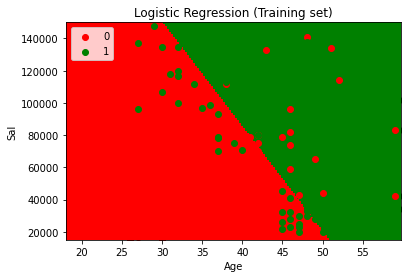

In [25]:
#Visualizing training set results

from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_train), y_train

x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 0, stop=x_set[:,0].max() + 0, step =0.25),
                     np.arange(start = x_set[:,1].min() - 0, stop=x_set[:,1].max() + 1, step =0.25))

plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape), cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set== j, 0], x_set[y_set == j, 1], c = ListedColormap(("red",'green'))(i),label = j)

plt.title("Logistic Regression (Training set)")
plt.xlabel("Age")
plt.ylabel("Sal")
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


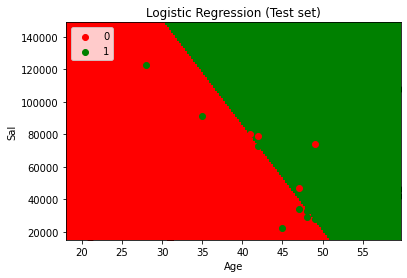

In [27]:
#Visualizing test set results

from matplotlib.colors import ListedColormap

x_set1, y_set1 = sc.inverse_transform(x_test), y_test

x11, x22 = np.meshgrid(np.arange(start = x_set1[:,0].min() - 0, stop=x_set1[:,0].max() + 0, step =0.25),
                     np.arange(start = x_set1[:,1].min() - 0, stop=x_set1[:,1].max() + 1, step =0.25))

plt.contourf(x11, x22, classifier.predict(sc.transform(np.array([x11.ravel(), x22.ravel()]).T)).reshape(x11.shape), cmap=ListedColormap(('red','green')))

plt.xlim(x11.min(), x11.max())
plt.ylim(x22.min(), x22.max())

for i, j in enumerate (np.unique(y_set1)):
  plt.scatter(x_set1[y_set1== j, 0], x_set1[y_set1 == j, 1], c = ListedColormap(("red",'green'))(i),label = j)

plt.title("Logistic Regression (Test set)")
plt.xlabel("Age")
plt.ylabel("Sal")
plt.legend()
plt.show()
